# Part1. K-Nearest Neighbors

<p>KNN is a form of <i>instance</i>, or <i>memory</i> based learning wherein we don't learn a function $f(X)$ to estimate $E[Y|X]$. It is a nonlinear, nonparametric model. To make a classification for a given instance $\mathbf{x}^{(i)}$, we search the training data for the $k$-nearest neighbors, as defined by some distance metric $d(\mathbf{x}^{(i)},\mathbf{x}^{(j)})$. The estimate of $h_{k,\cal{D}}(\mathbf{x})$ is then given by:<br><br>

<center>$h_{k,\cal{D}}(\mathbf{x}) = \underset{j}{\operatorname{argmax}}\big({\frac{1}{k} \sum\limits_{i \in \cal{N_k(\mathbf{x})}}} \mathbb{1}\{y^{(i)}=j\}\big)$</center><br><br>

<center>where $\cal{N_{k}(\mathbf{x})} = \{x^{(j)}\in\cal{D} \text{: k closest points to } \mathbf{x} \text{ in } \cal{D}\}$</center>

<br>
So, we need a distance metric to determine closest points. The most common distance function used in k-NN is the <i>Euclidean Distance</i>.<br><br>

Let $\mathbf{x} = <x_1,...x_p>$ be a $p$-dimensional vector, then for two instances $i \text{ and } j$:<br><br>
<center>$eud(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \sqrt{(x_1^{(i)}-x_1^{(j)})^2+...+(x_p^{(i)}-x_p^{(j)})^2} = \sqrt{\sum\limits_{t=1}^p (x_t^{(i)}-x_t^{(j)})^2}$
</center>
<br><br>

See here for implementation details, 
(https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
</p>

In [1]:
%matplotlib notebook 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.spatial.distance 
import math

from IPython.display import Image
from sklearn.preprocessing import scale 
# from sklearn.grid_search import GridSearchCV
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

from YourAnswer import crossValidation_Ridge,crossValidation_Lasso
from YourAnswer import predictKNN
from utils import plotData, vis_decision_boundary, vis_coef, vis_mse

## 1. Data preparation

### what does the data look like?

In [2]:
data1 = pd.read_csv("ex2data1.txt", header=None, names=['test1', 'test2', 'accepted'])
data1.head()

,test1,test2,accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


<IPython.core.display.Javascript object>


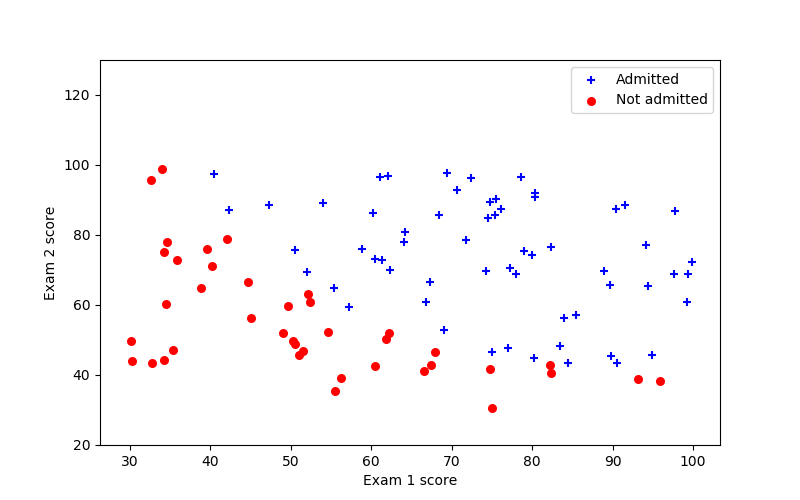

In [3]:
ax = plotData(data1)
ax.set_ylim([20, 130])
ax.legend(['Admitted', 'Not admitted'], loc='best')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

### data shape

In [4]:
X = data1[['test1', 'test2']].values
y = data1.accepted.values
n, d = X.shape
n, d

(100, 2)

In [5]:
X.shape[0]

100

## 2. Modeling

In [6]:
k=3
result_knn = predictKNN(X,X,y,k)

<IPython.core.display.Javascript object>


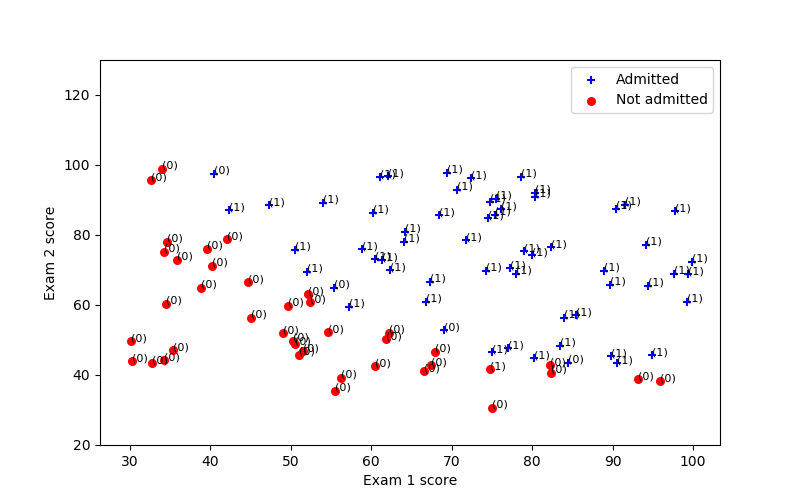

In [7]:
ax = plotData(data1)
ax.set_ylim([20, 130])
i = 0
for xy in zip(X[:,0],X[:,1]):
    ax.annotate('(%s)' % int(result_knn[i]), xy=xy, textcoords='data',size=8)
    i += 1
ax.set_ylim([20, 130])
ax.legend(['Admitted', 'Not admitted'], loc='best')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

In [8]:
print ('K-nearest neighbors, k = '+str(k)+', training accuracy : ' + str(np.mean(result_knn == y)))

K-nearest neighbors, k = 3, training accuracy : 0.95


In [9]:
result_knn

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

## 3. Decision boundary

<IPython.core.display.Javascript object>


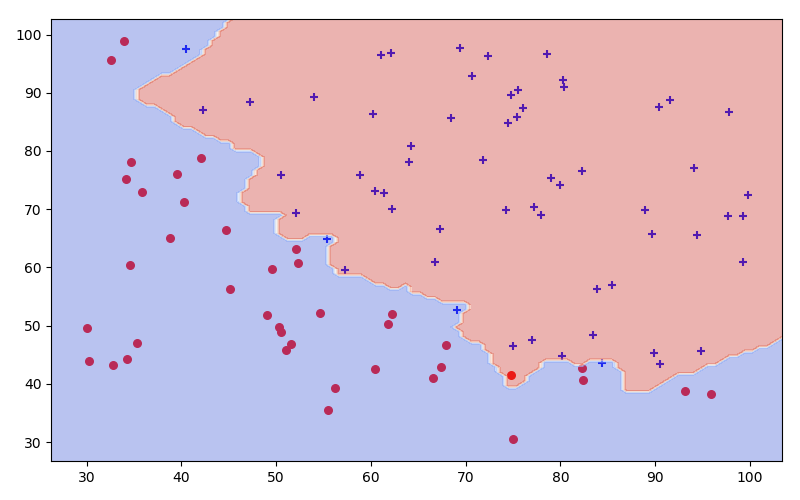

In [10]:
plotData(data1)
vis_decision_boundary(X, y, k)
plt.show()
plt.tight_layout()

 Let's plot the training accuracy when k becomes large.

<IPython.core.display.Javascript object>


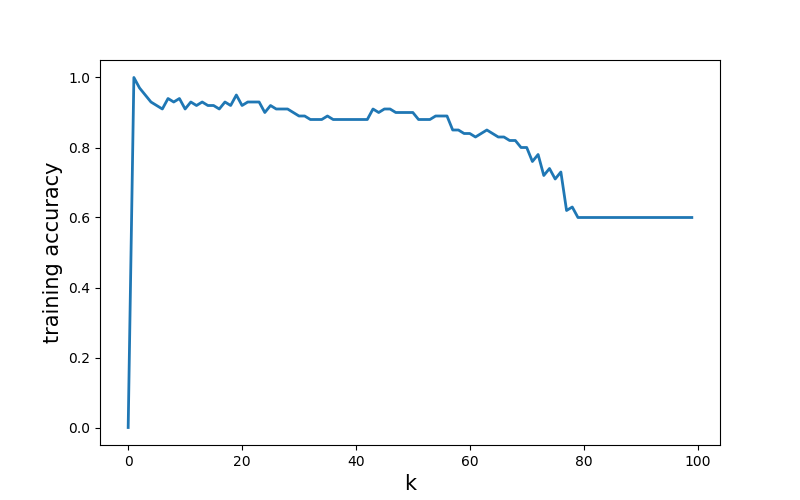

In [11]:

accuracy_from_dif_k = np.zeros((100,))

for dif_k in range(1,100):
    result_knn = predictKNN(targetX=X, dataSet=X, labels=y, k=dif_k)
    accuracy = np.mean(result_knn == y)
    accuracy_from_dif_k[dif_k] = accuracy
    
#print ('K-nearest neighbors, k = '+str(k)+', training accuracy : ' + str(np.mean(result_knn == y)))    
plt.figure(figsize=(8,5))
plt.plot(accuracy_from_dif_k, linewidth=2.0)
plt.ylabel('training accuracy',fontsize=15)
plt.xlabel('k',fontsize=15)
plt.show()

# Part2. Regularizers

### Data Preparation
Let's explore what the data look like via info() which shows the number of data, whether non exists, and data type 

In [12]:

df = pd.read_csv('./Hitters.csv').dropna().drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [13]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [14]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummies.info()
print(dummies.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 6 columns):
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: uint8(6)
memory usage: 3.6 KB
   League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0


In [15]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Dataset splitting (Train/Test)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=False)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 45.7 KB


### 1. Ridge Regression 

Scikit-learn Ridge regression uses linear least squares with L2 regularization.



The __sklearn Ridge()__ function has the standard L2 penalty:
### $$ \lambda ||\theta_1||^2_2 $$

In __sklearn Ridge()__ function, it uses hyperparameter 'alpha' which is the same as 'lambda' as we learned.

<IPython.core.display.Javascript object>


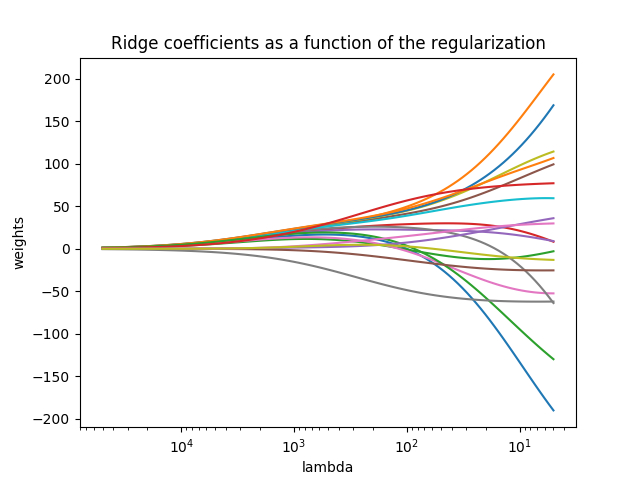

In [16]:
from sklearn.preprocessing import StandardScaler
lambdas = 10**np.linspace(5,1,100)*0.5

ridge = Ridge()
coefs = []

scaled_X = StandardScaler().fit_transform(X)

for a in lambdas:
    ridge.set_params(alpha=a)
    ridge.fit(scaled_X, y)
    coefs.append(ridge.coef_)

vis_coef(lambdas, coefs, method='Ridge')

The above plot shows that the Ridge coefficients get larger when we decrease alpha.

#### lambda = 4

In [17]:
ridge2 = Ridge(alpha=4)
scaled_X_train = StandardScaler().fit_transform(X_train)
scaled_X_test = StandardScaler().fit_transform(X_test)
ridge2.fit(scaled_X_train, y_train)
pred = ridge2.predict(scaled_X_test)
print('MSE : ',mean_squared_error(y_test, pred))

MSE :  91239.06299183621


#### lambda = $10^{10}$ 
This big penalty shrinks the coefficients to a very large degree and makes the model more biased, resulting in a higher MSE.

In [18]:
ridge2.set_params(alpha=10**10)
ridge2.fit(scaled_X_train, y_train)
pred = ridge2.predict(scaled_X_test)
print('MSE : ',mean_squared_error(y_test, pred))

MSE :  148912.58480143113


### Cross Validation for selecting the best lambda(=alpha)
#### Implement crossValidation_Ridge to find the best lambda
You should return these values/objects correctly.
1. MSE_set : MSE list that each element is correspond to the mean squared error of each lambda, i.e. having the same length as the lambdas. 
2. best_MSE : The lowest MSE of cross validation, which indicates the lambda used for this cv estimation is the best
3. best_lambda : Suggested lambda from CV estimation
4. test_MSE : MSE estimated on the test data after fitting the model using the whole data and best_lambda
5. ridge : The best model we obtained

Here, we divide the data into 5 groups, i.e. 5-fold CV

In [19]:
MSE_set, best_MSE, best_lambda, test_MSE, ridge= crossValidation_Ridge(lambdas,5, scaled_X_train, y_train,scaled_X_test,y_test)

In [20]:
print('best lambda : ',best_lambda)
print('test MSE : ',test_MSE)

best lambda :  20.18508629298277
test MSE :  91028.56766942197


<IPython.core.display.Javascript object>


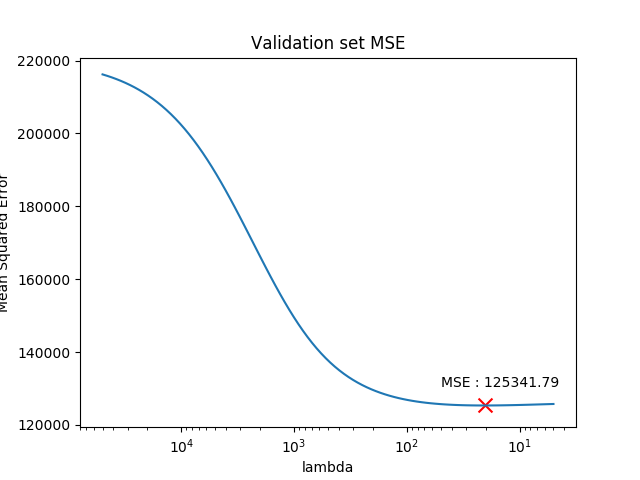

In [21]:
vis_mse(lambdas, MSE_set, best_lambda, best_MSE)

In [22]:
pd.Series(ridge2.coef_, index=X.columns)

AtBat          4.351724e-06
Hits           4.703146e-06
HmRun          3.621959e-06
Runs           4.410071e-06
RBI            4.632904e-06
Walks          4.556536e-06
Years          3.789476e-06
CAtBat         4.974901e-06
CHits          5.190587e-06
CHmRun         5.186077e-06
CRuns          5.336631e-06
CRBI           5.533257e-06
CWalks         4.669595e-06
PutOuts        3.338004e-06
Assists        8.553750e-07
Errors         2.233783e-07
League_N      -1.601757e-07
Division_W    -1.941280e-06
NewLeague_N    3.069185e-08
dtype: float64

### 2. The Lasso

For sklearn __Lasso()__ function, the standard L1 penalty is:
### $$ \lambda ||\theta_1||_1 $$

<IPython.core.display.Javascript object>


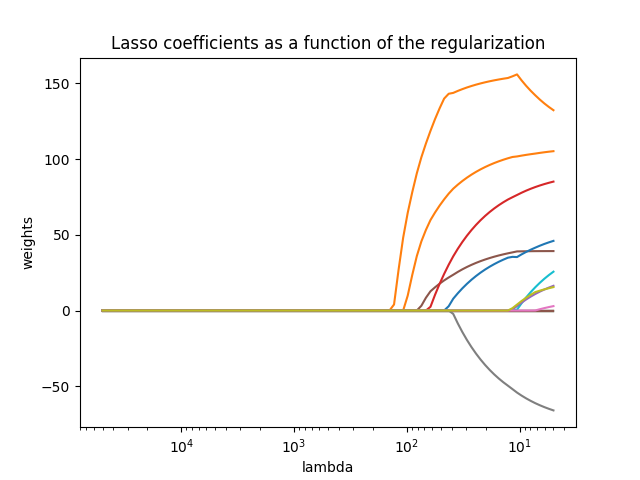

In [23]:
lasso = Lasso(max_iter=10000)
coefs_lasso = []

for a in lambdas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scaled_X_train, y_train)
    coefs_lasso.append(lasso.coef_)

vis_coef(lambdas,coefs_lasso, method='Lasso')

#### http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### Cross Validation for selecting best lambda(=alpha)
#### Implement crossValidation_Lasso to find the best lambda
You should return these values/objects correctly.
1. MSE_set : MSE list that each element is correspond to the mean squared error of each lambda, i.e. having the same length as the lambdas. 
2. best_MSE : The lowest MSE of cross validation, which indicates the lambda used for this cv estimation is the best
3. best_lambda : Suggested lambda from CV estimation
4. test_MSE : MSE estimated on the test data after fitting the model using the whole data and best_lambda
5. lasso : The best model we obtained

Here, we divide the data into 5 groups, i.e. 5-fold CV

In [24]:
MSE_set_lasso, best_MSE_lasso, best_lambda_lasso, test_MSE_lasso, lasso  = crossValidation_Lasso(lambdas, 5, scaled_X_train, y_train,scaled_X_test,y_test)

In [25]:
print('best_lambda : ',best_lambda_lasso)
print('test_MSE : ',test_MSE_lasso)

best_lambda :  12.676822469850544
test_MSE :  89712.32244683792


<IPython.core.display.Javascript object>


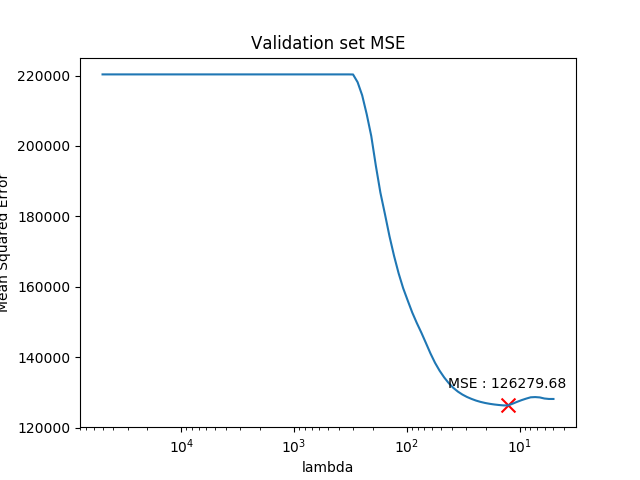

In [26]:
vis_mse(lambdas,MSE_set_lasso,best_lambda_lasso,best_MSE_lasso)

### Compare the coefficients of Lasso with the ones of Ridge

In [27]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat           -0.000000
Hits           104.241960
HmRun           -0.000000
Runs             0.000000
RBI              0.000000
Walks           39.211012
Years           -0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          19.515709
CRuns           43.308258
CRBI           138.075076
CWalks          -0.000000
PutOuts         82.954522
Assists         13.105344
Errors          -0.000000
League_N         1.194687
Division_W     -63.093149
NewLeague_N     13.493285
dtype: float64